Import libraries requred for the script

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from numpy.polynomial import polynomial as npp
from scipy.stats import linregress

Read the CSV files

In [2]:
filename = 'Dataset_BP1_v6'
df = pd.read_csv(filename + '.csv')


Check the columns in the data

In [3]:
# df.describe(include = [np.number])
# df.describe(exclude = None)
# list of dtypes to include 
include =['object', 'float', 'int'] 
  
# calling describe method 
desc = df.describe(include = include)
desc

,CUT_LENGTH,CONV_TIME,PRESSURE_S1_L,PRESSURE_S1_R,PRESSURE_S2_L,PRESSURE_S2_R,PRESSURE_S3_L,PRESSURE_S3_R,PRESSURE_S4_L,PRESSURE_S4_R,...,MID_SPLICE_SLOPE5,MID_SPLICE_SLOPE10,MID_SPLICE_SLOPE20,RHT_SPLICE_LAG1,RHT_SPLICE_MA5,RHT_SPLICE_MA10,RHT_SPLICE_MA20,RHT_SPLICE_SLOPE5,RHT_SPLICE_SLOPE10,RHT_SPLICE_SLOPE20
count,149629.000000,149629.000000,149629.000000,149629.000000,149629.000000,149629.000000,149629.00000,149629.000000,149629.000000,149629.000000,...,149629.000000,149629.000000,149629.000000,149629.000000,149629.000000,149629.000000,149629.000000,149629.000000,149629.000000,149629.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1707.247651,83.212990,0.078746,0.077521,0.066859,0.053946,0.06898,0.053963,0.068897,0.054191,...,-0.000219,-0.000119,-0.000070,6.990955,6.990583,6.990621,6.990641,-0.000128,-0.000046,-0.000064
std,2.053755,210.430782,0.063748,0.062464,0.046191,0.043984,0.04152,0.042369,0.042958,0.043031,...,0.466141,0.245234,0.132223,2.390135,1.844157,1.650035,1.449383,0.547409,0.295520,0.156442
min,1609.566000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,-12.375970,-12.263440,-12.263440,-44.709190,-16.385950,-7.765449,-2.709569,-10.962440,-5.512826,-2.855289
25%,1706.078000,28.615000,0.050000,0.050000,0.040000,0.010000,0.05000,0.010000,0.040000,0.010000,...,-0.207924,-0.114381,-0.062509,5.730070,5.965577,6.007862,6.068931,-0.250238,-0.145350,-0.078493
50%,1707.404000,35.617000,0.080000,0.080000,0.070000,0.050000,0.07000,0.050000,0.070000,0.050000,...,-0.002113,-0.006324,-0.003980,7.083863,7.061578,7.031463,6.991941,0.005296,0.001823,0.000442
75%,1708.582000,70.386000,0.100000,0.100000,0.090000,0.080000,0.10000,0.080000,0.100000,0.080000,...,0.191080,0.104527,0.059310,8.429553,8.124207,8.031606,7.915242,0.270643,0.146436,0.083174


In [4]:
df.columns

Index(['RECID', 'CUT_LENGTH', 'CONV_TIME', 'PRESSURE_S1_L', 'PRESSURE_S1_R',
       'PRESSURE_S2_L', 'PRESSURE_S2_R', 'PRESSURE_S3_L', 'PRESSURE_S3_R',
       'PRESSURE_S4_L', 'PRESSURE_S4_R', 'PRESSURE_S5_L', 'PRESSURE_S5_R',
       'COMP_MACHINEID', 'COMP_POSITION_BIN', 'LFT_SPLICE_LAG1',
       'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20',
       'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
       'MID_SPLICE_LAG1', 'MID_SPLICE_MA5', 'MID_SPLICE_MA10',
       'MID_SPLICE_MA20', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
       'MID_SPLICE_SLOPE20', 'RHT_SPLICE_LAG1', 'RHT_SPLICE_MA5',
       'RHT_SPLICE_MA10', 'RHT_SPLICE_MA20', 'RHT_SPLICE_SLOPE5',
       'RHT_SPLICE_SLOPE10', 'RHT_SPLICE_SLOPE20', 'SPLICE_OK'],
      dtype='object')

Sort the data by timestamp

In [5]:
print(df.shape)
df = df.drop_duplicates(subset=['CUT_LENGTH', 'CONV_TIME', 'PRESSURE_S1_L', 'PRESSURE_S1_R', 'PRESSURE_S2_L',
                                       'PRESSURE_S2_R', 'PRESSURE_S3_L', 'PRESSURE_S3_R', 'PRESSURE_S4_L',
                                       'PRESSURE_S4_R', 'PRESSURE_S5_L', 'PRESSURE_S5_R', 'COMP_POSITION_BIN', 
                                       'LFT_SPLICE_LAG1', 'MID_SPLICE_LAG1', 'RHT_SPLICE_LAG1','SPLICE_OK'])
print(df.shape)

print(df.shape)
df = df.drop_duplicates(subset=['CUT_LENGTH', 'CONV_TIME', 'PRESSURE_S1_L', 'PRESSURE_S1_R', 'PRESSURE_S2_L',
                                       'PRESSURE_S2_R', 'PRESSURE_S3_L', 'PRESSURE_S3_R', 'PRESSURE_S4_L',
                                       'PRESSURE_S4_R', 'PRESSURE_S5_L', 'PRESSURE_S5_R', 'COMP_POSITION_BIN', 
                                       'LFT_SPLICE_LAG1', 'MID_SPLICE_LAG1', 'RHT_SPLICE_LAG1'])
# df = df.drop_duplicates()
print(df.shape)

(149629, 37)
(149615, 37)
(149615, 37)
(149615, 37)


In [6]:
# Duplicate rows grouped by a column, typically ID column
# pd.concat(g for _, g in df.groupby("SPLICE_OK") if len(g) > 1)

# df[ids.isin(ids[ids.duplicated()])].sort("ID")



Check missing data

In [7]:
df['CUT_LENGTH'] = pd.to_numeric(df['CUT_LENGTH'], errors='coerce')
df['CONV_TIME'] = pd.to_numeric(df['CONV_TIME'], errors='coerce')
df['LFT_SPLICE_LAG1'] = pd.to_numeric(df['LFT_SPLICE_LAG1'], errors='coerce')
df['MID_SPLICE_LAG1'] = pd.to_numeric(df['MID_SPLICE_LAG1'], errors='coerce')
df['RHT_SPLICE_LAG1'] = pd.to_numeric(df['RHT_SPLICE_LAG1'], errors='coerce')
df['COMP_POSITION_BIN'] = pd.to_numeric(df['COMP_POSITION_BIN'], errors='coerce')

df['PRESSURE_S1_L'] = pd.to_numeric(df['PRESSURE_S1_L'], errors='coerce')
df['PRESSURE_S2_L'] = pd.to_numeric(df['PRESSURE_S2_L'], errors='coerce')
df['PRESSURE_S3_L'] = pd.to_numeric(df['PRESSURE_S3_L'], errors='coerce')
df['PRESSURE_S4_L'] = pd.to_numeric(df['PRESSURE_S4_L'], errors='coerce')
df['PRESSURE_S5_L'] = pd.to_numeric(df['PRESSURE_S5_L'], errors='coerce')

df['PRESSURE_S1_R'] = pd.to_numeric(df['PRESSURE_S1_R'], errors='coerce')
df['PRESSURE_S2_R'] = pd.to_numeric(df['PRESSURE_S2_R'], errors='coerce')
df['PRESSURE_S3_R'] = pd.to_numeric(df['PRESSURE_S3_R'], errors='coerce')
df['PRESSURE_S4_R'] = pd.to_numeric(df['PRESSURE_S4_R'], errors='coerce')
df['PRESSURE_S5_R'] = pd.to_numeric(df['PRESSURE_S5_R'], errors='coerce')



In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(10))
df = df.dropna()



                   Total  Percent
SPLICE_OK              0      0.0
LFT_SPLICE_MA10        0      0.0
LFT_SPLICE_LAG1        0      0.0
COMP_POSITION_BIN      0      0.0
COMP_MACHINEID         0      0.0
PRESSURE_S5_R          0      0.0
PRESSURE_S5_L          0      0.0
PRESSURE_S4_R          0      0.0
PRESSURE_S4_L          0      0.0
PRESSURE_S3_R          0      0.0


In [9]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))


                    Total  Percent
SPLICE_OK               0      0.0
LFT_SPLICE_MA10         0      0.0
LFT_SPLICE_LAG1         0      0.0
COMP_POSITION_BIN       0      0.0
COMP_MACHINEID          0      0.0
PRESSURE_S5_R           0      0.0
PRESSURE_S5_L           0      0.0
PRESSURE_S4_R           0      0.0
PRESSURE_S4_L           0      0.0
PRESSURE_S3_R           0      0.0
PRESSURE_S3_L           0      0.0
PRESSURE_S2_R           0      0.0
PRESSURE_S2_L           0      0.0
PRESSURE_S1_R           0      0.0
PRESSURE_S1_L           0      0.0
CONV_TIME               0      0.0
CUT_LENGTH              0      0.0
LFT_SPLICE_MA5          0      0.0
LFT_SPLICE_MA20         0      0.0
RHT_SPLICE_SLOPE20      0      0.0


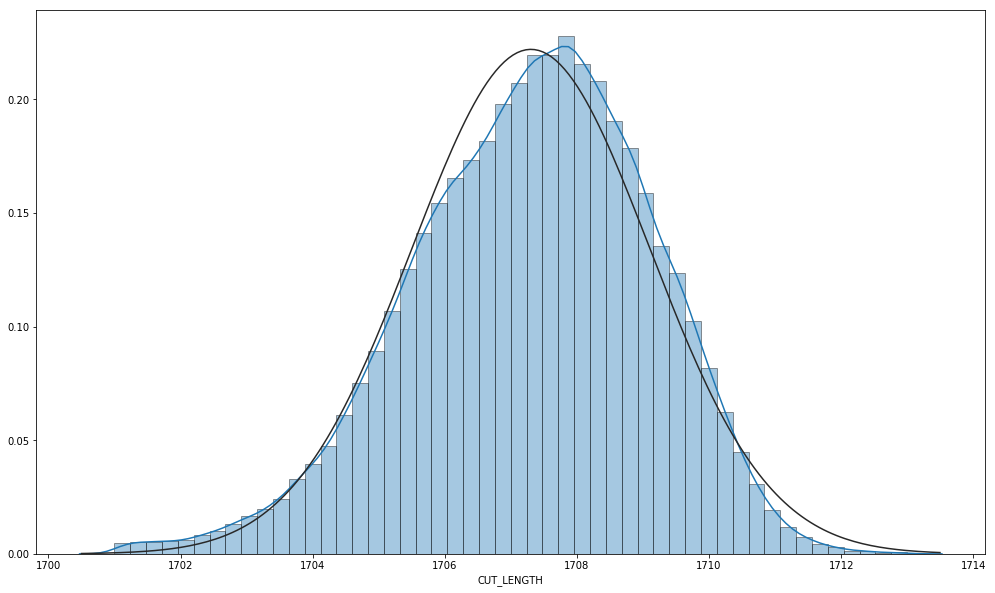

In [10]:
df.sort_values(by = 'CUT_LENGTH', ascending = False)[:2]
# df_mod = df
df_mod = df.drop(df[df['CUT_LENGTH'] < 1701].index)
df_mod = df_mod.drop(df[df['CUT_LENGTH'] > 1713].index)
#histogram and normal probability plot
fig = plt.figure(figsize=(17, 10))
sns.distplot(df_mod['CUT_LENGTH'], fit=norm,hist_kws=dict(edgecolor="k", linewidth=1));
# fig = plt.figure()
# res = stats.probplot(df['CUT_LENGTH'], plot=plt)

In [11]:
my_cols = ['CUT_LENGTH', 'CONV_TIME', 'PRESSURE_S1_L', 'PRESSURE_S1_R',
       'PRESSURE_S2_L', 'PRESSURE_S2_R', 'PRESSURE_S3_L', 'PRESSURE_S3_R',
       'PRESSURE_S4_L', 'PRESSURE_S4_R', 'PRESSURE_S5_L', 'PRESSURE_S5_R',
       'LFT_SPLICE_LAG1', 'MID_SPLICE_LAG1', 'RHT_SPLICE_LAG1', 'SPLICE_OK']

my_df = df[my_cols]
numeric_cols = my_df.select_dtypes(include=[np.number]).columns
print(numeric_cols)

df_temp1 = my_df[my_df[numeric_cols].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
df_temp2 = my_df[my_df['SPLICE_OK']==1]
df_temp3 = df_temp2[df_temp2[['LFT_SPLICE_LAG1', 'MID_SPLICE_LAG1', 'RHT_SPLICE_LAG1']].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
print(df_temp1.shape)

Index(['CUT_LENGTH', 'CONV_TIME', 'PRESSURE_S1_L', 'PRESSURE_S1_R',
       'PRESSURE_S2_L', 'PRESSURE_S2_R', 'PRESSURE_S3_L', 'PRESSURE_S3_R',
       'PRESSURE_S4_L', 'PRESSURE_S4_R', 'PRESSURE_S5_L', 'PRESSURE_S5_R',
       'LFT_SPLICE_LAG1', 'MID_SPLICE_LAG1', 'RHT_SPLICE_LAG1', 'SPLICE_OK'],
      dtype='object')
(140394, 16)


In [12]:
my_df[numeric_cols].describe()

,CUT_LENGTH,CONV_TIME,PRESSURE_S1_L,PRESSURE_S1_R,PRESSURE_S2_L,PRESSURE_S2_R,PRESSURE_S3_L,PRESSURE_S3_R,PRESSURE_S4_L,PRESSURE_S4_R,PRESSURE_S5_L,PRESSURE_S5_R,LFT_SPLICE_LAG1,MID_SPLICE_LAG1,RHT_SPLICE_LAG1,SPLICE_OK
count,149615.000000,149615.000000,149615.000000,149615.000000,149615.000000,149615.000000,149615.000000,149615.00000,149615.000000,149615.000000,149615.000000,149615.000000,149615.000000,149615.000000,149615.000000,149615.000000
mean,1707.247612,83.210255,0.078739,0.077514,0.066852,0.053943,0.068973,0.05396,0.068891,0.054188,0.071853,0.052882,6.770666,7.193190,6.991023,0.805528
std,2.053829,210.436726,0.063747,0.062463,0.046187,0.043985,0.041516,0.04237,0.042954,0.043032,0.045469,0.043885,2.333279,2.018858,2.390093,0.395795
min,1609.566000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-47.200000,-56.381480,-44.709190,0.000000
25%,1706.078000,28.615000,0.050000,0.050000,0.040000,0.010000,0.050000,0.01000,0.040000,0.010000,0.050000,0.010000,5.521538,6.143371,5.730070,1.000000
50%,1707.404000,35.617000,0.080000,0.080000,0.070000,0.050000,0.070000,0.05000,0.070000,0.050000,0.070000,0.050000,6.829313,7.192109,7.083863,1.000000
75%,1708.582000,70.383000,0.100000,0.100000,0.090000,0.080000,0.100000,0.08000,0.100000,0.080000,0.100000,0.080000,8.123629,8.334332,8.429698,1.000000
max,1719.298000,10034.240000,1.300000,2.000000,2.000000,1.000000,0.500000,0.76000,0.800000,0.900000,0.500000,1.000000,27.813620,26.034800,27.091790,1.000000


In [13]:
df_low = my_df[my_df[numeric_cols].apply(lambda x: ((x - x.mean()) / x.std() >= -2) & ((x - x.mean()) / x.std() < 0)).all(axis=1)]
df_high = my_df[my_df[numeric_cols].apply(lambda x: ((x - x.mean()) / x.std() > 0) & ((x - x.mean()) / x.std() <= 2)).all(axis=1)]

In [14]:
df_low.describe()

,CUT_LENGTH,CONV_TIME,PRESSURE_S1_L,PRESSURE_S1_R,PRESSURE_S2_L,PRESSURE_S2_R,PRESSURE_S3_L,PRESSURE_S3_R,PRESSURE_S4_L,PRESSURE_S4_R,PRESSURE_S5_L,PRESSURE_S5_R,LFT_SPLICE_LAG1,MID_SPLICE_LAG1,RHT_SPLICE_LAG1,SPLICE_OK
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_high.describe()

,CUT_LENGTH,CONV_TIME,PRESSURE_S1_L,PRESSURE_S1_R,PRESSURE_S2_L,PRESSURE_S2_R,PRESSURE_S3_L,PRESSURE_S3_R,PRESSURE_S4_L,PRESSURE_S4_R,PRESSURE_S5_L,PRESSURE_S5_R,LFT_SPLICE_LAG1,MID_SPLICE_LAG1,RHT_SPLICE_LAG1,SPLICE_OK
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.0
mean,1708.651177,176.276500,0.102121,0.102273,0.101717,0.091465,0.106616,0.092121,0.105354,0.090909,0.107727,0.091970,8.189359,8.479687,8.538992,1.0
std,0.915360,85.809092,0.020065,0.019574,0.021565,0.015687,0.020055,0.015398,0.022089,0.015905,0.020536,0.015001,1.020979,0.933143,1.046664,0.0
min,1707.269000,84.120000,0.080000,0.080000,0.070000,0.060000,0.070000,0.060000,0.070000,0.060000,0.080000,0.060000,6.770704,7.264321,7.062012,1.0
25%,1707.983250,113.006000,0.090000,0.090000,0.090000,0.080000,0.100000,0.080000,0.090000,0.080000,0.100000,0.080000,7.292649,7.714127,7.684387,1.0
50%,1708.427500,157.721500,0.100000,0.100000,0.100000,0.090000,0.100000,0.090000,0.100000,0.090000,0.100000,0.090000,7.912710,8.326228,8.431868,1.0
75%,1709.350500,203.216750,0.100000,0.100000,0.120000,0.100000,0.120000,0.100000,0.120000,0.100000,0.120000,0.100000,8.859460,9.061806,9.167410,1.0
max,1711.267000,491.452000,0.180000,0.170000,0.150000,0.130000,0.150000,0.130000,0.150000,0.130000,0.160000,0.130000,10.935120,11.040180,11.388360,1.0


In [16]:
my_df.describe()

,CUT_LENGTH,CONV_TIME,PRESSURE_S1_L,PRESSURE_S1_R,PRESSURE_S2_L,PRESSURE_S2_R,PRESSURE_S3_L,PRESSURE_S3_R,PRESSURE_S4_L,PRESSURE_S4_R,PRESSURE_S5_L,PRESSURE_S5_R,LFT_SPLICE_LAG1,MID_SPLICE_LAG1,RHT_SPLICE_LAG1,SPLICE_OK
count,149615.000000,149615.000000,149615.000000,149615.000000,149615.000000,149615.000000,149615.000000,149615.00000,149615.000000,149615.000000,149615.000000,149615.000000,149615.000000,149615.000000,149615.000000,149615.000000
mean,1707.247612,83.210255,0.078739,0.077514,0.066852,0.053943,0.068973,0.05396,0.068891,0.054188,0.071853,0.052882,6.770666,7.193190,6.991023,0.805528
std,2.053829,210.436726,0.063747,0.062463,0.046187,0.043985,0.041516,0.04237,0.042954,0.043032,0.045469,0.043885,2.333279,2.018858,2.390093,0.395795
min,1609.566000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-47.200000,-56.381480,-44.709190,0.000000
25%,1706.078000,28.615000,0.050000,0.050000,0.040000,0.010000,0.050000,0.01000,0.040000,0.010000,0.050000,0.010000,5.521538,6.143371,5.730070,1.000000
50%,1707.404000,35.617000,0.080000,0.080000,0.070000,0.050000,0.070000,0.05000,0.070000,0.050000,0.070000,0.050000,6.829313,7.192109,7.083863,1.000000
75%,1708.582000,70.383000,0.100000,0.100000,0.090000,0.080000,0.100000,0.08000,0.100000,0.080000,0.100000,0.080000,8.123629,8.334332,8.429698,1.000000
max,1719.298000,10034.240000,1.300000,2.000000,2.000000,1.000000,0.500000,0.76000,0.800000,0.900000,0.500000,1.000000,27.813620,26.034800,27.091790,1.000000


In [17]:
df_temp1.describe()

,CUT_LENGTH,CONV_TIME,PRESSURE_S1_L,PRESSURE_S1_R,PRESSURE_S2_L,PRESSURE_S2_R,PRESSURE_S3_L,PRESSURE_S3_R,PRESSURE_S4_L,PRESSURE_S4_R,PRESSURE_S5_L,PRESSURE_S5_R,LFT_SPLICE_LAG1,MID_SPLICE_LAG1,RHT_SPLICE_LAG1,SPLICE_OK
count,140394.000000,140394.000000,140394.000000,140394.000000,140394.000000,140394.000000,140394.000000,140394.000000,140394.000000,140394.000000,140394.000000,140394.000000,140394.000000,140394.000000,140394.000000,140394.000000
mean,1707.326907,69.642629,0.073812,0.073043,0.064792,0.051894,0.067244,0.052253,0.067006,0.052497,0.069749,0.051140,6.843157,7.265271,7.081029,0.823240
std,1.765731,88.005778,0.037384,0.036946,0.038086,0.039020,0.038741,0.039227,0.039666,0.039868,0.041834,0.040034,1.979616,1.642153,2.031466,0.381467
min,1701.087000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.223872,1.139184,-0.163671,0.000000
25%,1706.137000,28.495000,0.050000,0.050000,0.040000,0.010000,0.050000,0.010000,0.040000,0.010000,0.050000,0.010000,5.620811,6.159724,5.832093,1.000000
50%,1707.435000,34.841000,0.080000,0.080000,0.070000,0.050000,0.070000,0.050000,0.070000,0.050000,0.070000,0.050000,6.870990,7.270326,7.088060,1.000000
75%,1708.590000,65.692000,0.100000,0.100000,0.090000,0.080000,0.100000,0.080000,0.100000,0.080000,0.100000,0.080000,8.122471,8.334620,8.428974,1.000000
max,1713.409000,714.485000,0.250000,0.250000,0.200000,0.180000,0.190000,0.180000,0.190000,0.180000,0.200000,0.180000,13.768610,13.243150,14.155860,1.000000


In [18]:
df_temp2.describe()

,CUT_LENGTH,CONV_TIME,PRESSURE_S1_L,PRESSURE_S1_R,PRESSURE_S2_L,PRESSURE_S2_R,PRESSURE_S3_L,PRESSURE_S3_R,PRESSURE_S4_L,PRESSURE_S4_R,PRESSURE_S5_L,PRESSURE_S5_R,LFT_SPLICE_LAG1,MID_SPLICE_LAG1,RHT_SPLICE_LAG1,SPLICE_OK
count,120519.000000,120519.000000,120519.000000,120519.000000,120519.000000,120519.000000,120519.000000,120519.000000,120519.000000,120519.000000,120519.000000,120519.000000,120519.000000,120519.000000,120519.000000,120519.0
mean,1707.388211,76.116366,0.076240,0.075259,0.065915,0.052662,0.068036,0.052785,0.067998,0.053011,0.070843,0.051791,6.925567,7.260755,7.199025,1.0
std,1.844779,173.273205,0.055616,0.054792,0.044704,0.042344,0.040974,0.041463,0.042572,0.042097,0.044769,0.042795,1.911455,1.628292,1.913137,0.0
min,1618.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.350620,-43.560310,-42.520840,1.0
25%,1706.242000,28.438000,0.050000,0.050000,0.040000,0.010000,0.050000,0.010000,0.040000,0.010000,0.050000,0.010000,5.731372,6.244236,6.039901,1.0
50%,1707.512000,34.490000,0.080000,0.080000,0.070000,0.050000,0.070000,0.050000,0.070000,0.050000,0.070000,0.050000,6.884304,7.248258,7.189938,1.0
75%,1708.638000,64.280500,0.100000,0.100000,0.090000,0.080000,0.100000,0.080000,0.100000,0.080000,0.100000,0.080000,8.122761,8.325720,8.433315,1.0
max,1718.597000,10006.670000,1.200000,1.200000,2.000000,1.000000,0.500000,0.760000,0.800000,0.760000,0.500000,1.000000,24.375080,24.900100,27.091790,1.0


In [19]:
df_temp3.describe()

,CUT_LENGTH,CONV_TIME,PRESSURE_S1_L,PRESSURE_S1_R,PRESSURE_S2_L,PRESSURE_S2_R,PRESSURE_S3_L,PRESSURE_S3_R,PRESSURE_S4_L,PRESSURE_S4_R,PRESSURE_S5_L,PRESSURE_S5_R,LFT_SPLICE_LAG1,MID_SPLICE_LAG1,RHT_SPLICE_LAG1,SPLICE_OK
count,118479.000000,118479.000000,118479.000000,118479.000000,118479.000000,118479.000000,118479.000000,118479.000000,118479.000000,118479.000000,118479.000000,118479.000000,118479.000000,118479.000000,118479.000000,118479.0
mean,1707.397725,74.624700,0.075974,0.075019,0.065811,0.052517,0.067936,0.052645,0.067903,0.052876,0.070729,0.051656,6.940199,7.262704,7.219868,1.0
std,1.829711,164.539763,0.054533,0.053780,0.044701,0.042244,0.040903,0.041380,0.042512,0.042023,0.044689,0.042684,1.746918,1.524193,1.756671,0.0
min,1618.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200108,2.376483,1.459724,1.0
25%,1706.251000,28.407000,0.050000,0.050000,0.040000,0.010000,0.050000,0.010000,0.040000,0.010000,0.050000,0.010000,5.747941,6.246841,6.041782,1.0
50%,1707.520000,34.294000,0.080000,0.080000,0.070000,0.050000,0.070000,0.050000,0.070000,0.050000,0.070000,0.050000,6.889079,7.248403,7.190806,1.0
75%,1708.641000,63.113500,0.100000,0.100000,0.090000,0.080000,0.100000,0.080000,0.100000,0.080000,0.100000,0.080000,8.120011,8.303363,8.428829,1.0
max,1718.597000,10006.670000,1.200000,1.200000,2.000000,1.000000,0.500000,0.760000,0.800000,0.760000,0.500000,1.000000,12.655470,12.141160,12.932450,1.0


In [20]:
#df.head
df.to_csv(filename + '_mod01.csv', header=True, index=False, float_format='%.5f')
